# Data

## Mounting Google Drive

In [2]:
# Mounting Google Drive locally to read datasets - skip if not working on colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
path = "/content/drive/MyDrive/ml4health/" # change this path to where your files are!
print(os.listdir(path))

['msk_impact_2017_clinical_data.tsv']


## Data Exploration & Preprocessing

In [4]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [5]:
df = pd.read_csv(path+"msk_impact_2017_clinical_data.tsv", sep="\t")
df.head()

,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,...,Sample coverage,Sample Type,Sex,Smoking History,Somatic Status,Specimen Preservation Type,Specimen Type,TMB (nonsynonymous),Tumor Purity,Patient's Vital Status
0,msk_impact_2017,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,250.0,0.2782,Matched,NaN,16,...,428,Primary,Female,Unknown,Matched,FFPE,Biopsy,17.746485,50.0,ALIVE
1,msk_impact_2017,P-0000015,P-0000015-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,198.0,0.3503,Matched,Liver,7,...,281,Metastasis,Female,Never,Matched,FFPE,Biopsy,7.764087,40.0,DECEASED
2,msk_impact_2017,P-0000023,P-0000023-T01-IM3,Mesothelioma,Peritoneal Mesothelioma,250.0,0.1596,Matched,NaN,5,...,454,Primary,Male,Never,Matched,FFPE,Biopsy,5.545777,30.0,DECEASED
3,msk_impact_2017,P-0000024,P-0000024-T01-IM3,Endometrial Cancer,Uterine Endometrioid Carcinoma,250.0,0.3878,Matched,Lung,6,...,1016,Metastasis,Female,Prev/Curr Smoker,Matched,FFPE,Resection,6.654932,40.0,ALIVE
4,msk_impact_2017,P-0000025,P-0000025-T01-IM3,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,250.0,0.0000,Matched,NaN,1,...,1161,Primary,Female,Never,Matched,FFPE,Resection,1.109155,NaN,ALIVE


In [6]:
df.shape

(10945, 27)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10945 entries, 0 to 10944
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study ID                       10945 non-null  object 
 1   Patient ID                     10945 non-null  object 
 2   Sample ID                      10945 non-null  object 
 3   Cancer Type                    10945 non-null  object 
 4   Cancer Type Detailed           10945 non-null  object 
 5   DNA Input                      10945 non-null  float64
 6   Fraction Genome Altered        10939 non-null  float64
 7   Matched Status                 10945 non-null  object 
 8   Metastatic Site                4779 non-null   object 
 9   Mutation Count                 10945 non-null  int64  
 10  Oncotree Code                  10945 non-null  object 
 11  Overall Survival (Months)      8142 non-null   float64
 12  Overall Survival Status        10943 non-null 

### Dropping columns with domain knowledge

In [8]:
# ID columns are dropped since they do not contain any information
df.drop(columns=["Study ID","Patient ID"], inplace = True)

# Repetitive columns are dropped
df.drop(columns=["Cancer Type Detailed"], inplace = True)

# Sample collection attributes dropped since they do not contain any info
df.drop(columns=["Sample ID"],
        inplace = True)

# Oncotree Code is dropped since it is repetition to cancer type
df.drop(columns=["Oncotree Code"], inplace = True)

# Survival repetitive attributes are dropped
df.drop(columns=["Overall Survival (Months)","Patient's Vital Status"], inplace = True)

df.shape

(10945, 20)

In [9]:
df.head()

,Cancer Type,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,Overall Survival Status,Primary Tumor Site,Sample Class,Sample Collection Source,Number of Samples Per Patient,Sample coverage,Sample Type,Sex,Smoking History,Somatic Status,Specimen Preservation Type,Specimen Type,TMB (nonsynonymous),Tumor Purity
0,Breast Cancer,250.0,0.2782,Matched,NaN,16,0:LIVING,Breast,Tumor,Outside,1,428,Primary,Female,Unknown,Matched,FFPE,Biopsy,17.746485,50.0
1,Breast Cancer,198.0,0.3503,Matched,Liver,7,1:DECEASED,Breast,Tumor,In-House,1,281,Metastasis,Female,Never,Matched,FFPE,Biopsy,7.764087,40.0
2,Mesothelioma,250.0,0.1596,Matched,NaN,5,1:DECEASED,Peritoneum,Tumor,In-House,1,454,Primary,Male,Never,Matched,FFPE,Biopsy,5.545777,30.0
3,Endometrial Cancer,250.0,0.3878,Matched,Lung,6,0:LIVING,Uterus,Tumor,In-House,1,1016,Metastasis,Female,Prev/Curr Smoker,Matched,FFPE,Resection,6.654932,40.0
4,Endometrial Cancer,250.0,0.0000,Matched,NaN,1,0:LIVING,Uterus,Tumor,In-House,2,1161,Primary,Female,Never,Matched,FFPE,Resection,1.109155,NaN


### Dealing with missing values


In [10]:
# before any operation on data, we split it into training and test to prevent information leakage!!!!
from sklearn.model_selection import train_test_split

X = df.drop("Overall Survival Status", axis=1)
y = df["Overall Survival Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [11]:
# imputing Metastatic Site
train_data["Metastatic Site"].fillna("None", inplace=True)
test_data["Metastatic Site"].fillna("None", inplace=True)

# imputing Tumor Purity
train_data.loc[:, "Tumor Purity"] = train_data["Tumor Purity"].fillna(train_data["Tumor Purity"].mode()[0])
test_data.loc[:, "Tumor Purity"] = test_data["Tumor Purity"].fillna(test_data["Tumor Purity"].mode()[0])


# dropping other NaN rows
train_data = train_data.dropna(subset=["Fraction Genome Altered","Primary Tumor Site","Specimen Type",
                                       "Smoking History","Overall Survival Status"], how='any')
test_data = test_data.dropna(subset=["Fraction Genome Altered","Primary Tumor Site","Specimen Type",
                                       "Smoking History","Overall Survival Status"], how='any')

### Final updates and encoding

In [12]:
# Dropping Matched Status since it has no information (99% same)
train_data = train_data.drop("Matched Status", axis=1)
test_data = test_data.drop("Matched Status", axis=1)

print(train_data.shape,test_data.shape)

(7629, 19) (3279, 19)


In [13]:
# Convert metastatic site into binary feature (to reflect there is metastasis or not)
train_data['Metastatic Site'] = train_data['Metastatic Site'].apply(lambda x: 0 if x == 'None' else 1)
test_data['Metastatic Site'] = test_data['Metastatic Site'].apply(lambda x: 0 if x == 'None' else 1)

In [14]:
# Combining rare cancer types into "Other"
top_cancer_types = train_data['Cancer Type'].value_counts().nlargest(20).index

train_data['Cancer Type'] = train_data['Cancer Type'].apply(lambda x: x if x in top_cancer_types else 'Other')
test_data['Cancer Type'] = test_data['Cancer Type'].apply(lambda x: x if x in top_cancer_types else 'Other')

In [15]:
# Same for Primary Tumor Site
top_primary_tumor_sites = train_data['Primary Tumor Site'].value_counts().nlargest(20).index

train_data['Primary Tumor Site'] = train_data['Primary Tumor Site'].apply(lambda x: x if x in top_primary_tumor_sites else 'Other')
test_data['Primary Tumor Site'] = test_data['Primary Tumor Site'].apply(lambda x: x if x in top_primary_tumor_sites else 'Other')

In [16]:
from sklearn.model_selection import train_test_split
from copy import deepcopy

# merging test and train before encodings to control dimensionality
merged = pd.concat([train_data, test_data], ignore_index=True)
data_cleaned = deepcopy(merged)

one_hot_features = ['Cancer Type', 'Primary Tumor Site', 'Smoking History',
                    'Specimen Preservation Type', 'Specimen Type']

binary_features = ['Sample Class', 'Sample Collection Source',
                   'Sample Type', 'Sex', 'Somatic Status']

# One hot encoding
one_hot_encoded = pd.get_dummies(data_cleaned[one_hot_features])

# Binary encoding
for feature in binary_features:
    data_cleaned[feature] = data_cleaned[feature].astype('category').cat.codes

# Combine into dataset
data_encoded = data_cleaned.drop(one_hot_features, axis=1)
data_encoded = pd.concat([data_encoded, one_hot_encoded], axis=1)

# Train and test separation
y_encoded = data_encoded['Overall Survival Status'].map({'0:LIVING': 0, '1:DECEASED': 1})
X_encoded = data_encoded.drop('Overall Survival Status', axis=1)

X_train_encoded = X_encoded.iloc[:len(train_data)]
X_test_encoded = X_encoded.iloc[len(train_data):]
y_train_encoded = y_encoded.iloc[:len(train_data)]
y_test_encoded = y_encoded.iloc[len(train_data):]

In [17]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7629 entries, 0 to 7628
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   DNA Input                                     7629 non-null   float64
 1   Fraction Genome Altered                       7629 non-null   float64
 2   Metastatic Site                               7629 non-null   int64  
 3   Mutation Count                                7629 non-null   int64  
 4   Sample Class                                  7629 non-null   int8   
 5   Sample Collection Source                      7629 non-null   int8   
 6   Number of Samples Per Patient                 7629 non-null   int64  
 7   Sample coverage                               7629 non-null   int64  
 8   Sample Type                                   7629 non-null   int8   
 9   Sex                                           7629 non-null   i

# Encrypted Machine Learning

## TenSEAL

In [26]:
!pip install tenseal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 40.8 MB/s eta 0:00:00


## Encrypted ML

### Data Processing for Enc ML


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Example DataFrames, replace these with your actual dataframes
# X_train_encoded = pd.read_csv('path_to_train.csv')
# X_test_encoded = pd.read_csv('path_to_test.csv')

# Identifying columns that are not one-hot (assuming one-hot are close to 0 or 1)
def identify_non_one_hot_columns(df):
    non_one_hot_columns = []
    for col in df.columns:
        if df[col].dtype == 'bool' or df[col].nunique() == 2:
            # Check if the column behaves like a one-hot encoder
            if df[col].mean() < 0.1 or df[col].mean() > 0.9:
                continue
        non_one_hot_columns.append(col)
    return non_one_hot_columns

# Get non-one-hot columns for training data
non_one_hot_columns_train = identify_non_one_hot_columns(X_train_encoded)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_encoded[non_one_hot_columns_train] = scaler.fit_transform(X_train_encoded[non_one_hot_columns_train])
X_test_encoded[non_one_hot_columns_train] = scaler.transform(X_test_encoded[non_one_hot_columns_train])

<ipython-input-18-5ab2cb337f94>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_encoded[non_one_hot_columns_train] = scaler.fit_transform(X_train_encoded[non_one_hot_columns_train])
<ipython-input-18-5ab2cb337f94>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_encoded[non_one_hot_columns_train] = scaler.transform(X_test_encoded[non_one_hot_columns_train])


In [19]:
import pandas as pd

# Example DataFrames, replace these with your actual dataframes
# X_train_encoded = pd.read_csv('path_to_train.csv')
# X_test_encoded = pd.read_csv('path_to_test.csv')
X_train_encoded = X_train_encoded.astype("float32")
X_test_encoded = X_test_encoded.astype("float32")

# Compute mean and standard deviation for each column in the training dataset
train_means = X_train_encoded.mean()
train_stds = X_train_encoded.std()

# Compute mean and standard deviation for each column in the test dataset
test_means = X_test_encoded.mean()
test_stds = X_test_encoded.std()

# Print the results for the training dataset
print("Training Dataset - Means and Standard Deviations:")
for col in X_train_encoded.columns:
    print(f"{col}: Mean = {train_means[col]:.4f}, Std Dev = {train_stds[col]:.4f}")

# Print the results for the test dataset
print("\nTest Dataset - Means and Standard Deviations:")
for col in X_test_encoded.columns:
    print(f"{col}: Mean = {test_means[col]:.4f}, Std Dev = {test_stds[col]:.4f}")

Training Dataset - Means and Standard Deviations:
DNA Input: Mean = -0.0000, Std Dev = 1.0001
Fraction Genome Altered: Mean = 0.0000, Std Dev = 1.0001
Metastatic Site: Mean = -0.0000, Std Dev = 1.0001
Mutation Count: Mean = 0.0000, Std Dev = 1.0001
Sample Class: Mean = 0.0000, Std Dev = 0.0000
Sample Collection Source: Mean = -0.0000, Std Dev = 1.0001
Number of Samples Per Patient: Mean = -0.0000, Std Dev = 1.0001
Sample coverage: Mean = 0.0000, Std Dev = 1.0001
Sample Type: Mean = -0.0000, Std Dev = 1.0001
Sex: Mean = -0.0000, Std Dev = 1.0001
Somatic Status: Mean = 0.0216, Std Dev = 0.1455
TMB (nonsynonymous): Mean = -0.0000, Std Dev = 1.0001
Tumor Purity: Mean = -0.0000, Std Dev = 1.0001
Cancer Type_Bladder Cancer: Mean = 0.0375, Std Dev = 0.1900
Cancer Type_Breast Cancer: Mean = 0.0000, Std Dev = 1.0001
Cancer Type_Cancer of Unknown Primary: Mean = 0.0170, Std Dev = 0.1294
Cancer Type_Colorectal Cancer: Mean = 0.0914, Std Dev = 0.2881
Cancer Type_Endometrial Cancer: Mean = 0.0211, 

In [20]:
X_train_fin = X_train_encoded.to_numpy()
X_test_fin = X_test_encoded.to_numpy()

In [21]:
y_train_fin = y_train_encoded.astype("float32").to_numpy().reshape(-1, 1)
y_test_fin = y_test_encoded.astype("float32").to_numpy().reshape(-1, 1)

In [22]:
X_train_fin.shape

(7629, 67)

### Single Layer MLP Encrypted training and evaluation

In [27]:
import torch
import tenseal as ts
import pandas as pd
import random
from time import time

# those are optional and are not necessary for training
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [ ]:
class LR(torch.nn.Module):

    def __init__(self, n_features):
        super(LR, self).__init__()
        self.lr = torch.nn.Linear(n_features, 1)

    def forward(self, x):
        out = torch.sigmoid(self.lr(x))
        return out

In [ ]:
n_features = X_train_fin.shape[1]
model = LR(n_features)
# use gradient descent with a learning_rate=1
optim = torch.optim.SGD(model.parameters(), lr=0.1)
# use Binary Cross Entropy Loss
criterion = torch.nn.BCELoss()

In [ ]:
y_train_fin.dtype

dtype('float32')

In [ ]:
# define the number of epochs for both plain and encrypted training
EPOCHS = 5

def train(model, optim, criterion, x, y, epochs=EPOCHS):
    for e in range(1, epochs + 1):
        optim.zero_grad()
        out = model(x)
        print(out.dtype, y.dtype)
        loss = criterion(out, y)
        loss.backward()
        optim.step()
        print(f"Loss at epoch {e}: {loss.data}")
    return model

model = train(model, optim, criterion, torch.tensor(X_train_fin), torch.tensor(y_train_fin))

torch.float32 torch.float32
Loss at epoch 1: 0.7093190550804138
torch.float32 torch.float32
Loss at epoch 2: 0.6454836130142212
torch.float32 torch.float32
Loss at epoch 3: 0.61383455991745
torch.float32 torch.float32
Loss at epoch 4: 0.5962717533111572
torch.float32 torch.float32
Loss at epoch 5: 0.5859662890434265


In [ ]:
def accuracy(model, x, y):
    out = model(x)
    correct = torch.abs(y - out) < 0.5
    return correct.float().mean()

plain_accuracy = accuracy(model, torch.tensor(X_test_fin), torch.tensor(y_test_fin))
print(f"Accuracy on plain test_set: {plain_accuracy}")

Accuracy on plain test_set: 0.7166818976402283



Test Set Performance:
Accuracy: 0.7166819152180542
F1-Score: 0.14061054579093432
ROC AUC Score: 0.634936394663357
Confusion Matrix:
 [[2274   70]
 [ 859   76]]


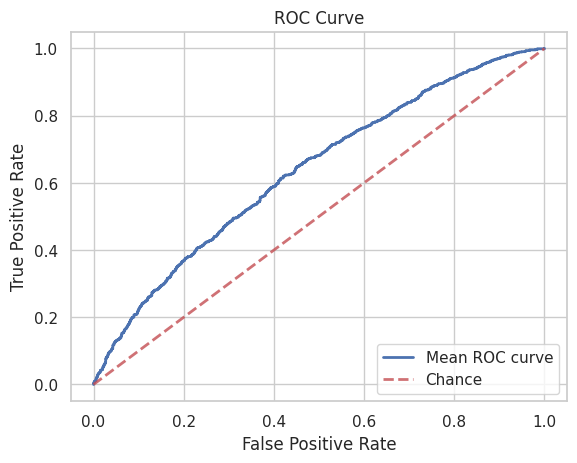

In [ ]:
X_test_fin = torch.tensor(X_test_fin).float()
y_test_fin = torch.tensor(y_test_fin).float()

# Use the PyTorch model to predict
y_pred_test_prob = model(X_test_fin).detach().numpy()  # Get probabilities
y_pred_test = (y_pred_test_prob > 0.5).astype(int)  # Convert probabilities to 0/1 predictions

# Calculate evaluation metrics using sklearn
accuracy_test = accuracy_score(y_test_fin, y_pred_test)
f1_test = f1_score(y_test_fin, y_pred_test)
roc_auc_test = roc_auc_score(y_test_fin, y_pred_test_prob)
conf_matrix_test = confusion_matrix(y_test_fin, y_pred_test)

print("\nTest Set Performance:")
print("Accuracy:", accuracy_test)
print("F1-Score:", f1_test)
print("ROC AUC Score:", roc_auc_test)
print("Confusion Matrix:\n", conf_matrix_test)

# Plot ROC Curve

mean_fpr, mean_tpr, _ = roc_curve(y_test_fin, y_pred_test_prob)
plt.plot(mean_fpr, mean_tpr, lw=2, label='Mean ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
n_splits = 5
kf = KFold(n_splits=n_splits)

# Initialize the results storage
results = {
    "accuracy": [],
    "f1_score": [],
    "roc_auc_score": [],
    "confusion_matrix": []
}

# Convert numpy arrays to PyTorch tensors
X = torch.tensor(X_train_fin, dtype=torch.float32)
y = torch.tensor(y_train_fin, dtype=torch.float32).view(-1, 1)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize model and optimizer
    model = LR(n_features)
    optim = torch.optim.SGD(model.parameters(), lr=0.1)
    criterion = torch.nn.BCELoss()

    # Train the model
    trained_model = train(model, optim, criterion, X_train, y_train, EPOCHS)

    # Evaluate the model
    y_pred = trained_model(X_test)
    y_pred_np = (y_pred.detach().numpy() > 0.5).astype(int)
    y_test_np = y_test.detach().numpy().astype(int)

    # Calculate metrics
    results['accuracy'].append(accuracy_score(y_test_np, y_pred_np))
    results['f1_score'].append(f1_score(y_test_np, y_pred_np))
    results['roc_auc_score'].append(roc_auc_score(y_test_np, y_pred.detach().numpy()))
    results['confusion_matrix'].append(confusion_matrix(y_test_np, y_pred_np))

# Print results
print(f"{n_splits}-Fold Results:")
for metric, scores in results.items():
    print(f"{metric}: Mean = {np.mean(scores)}, Scores = {scores}")


torch.float32 torch.float32
Loss at epoch 1: 0.7042365074157715
torch.float32 torch.float32
Loss at epoch 2: 0.6946676969528198
torch.float32 torch.float32
Loss at epoch 3: 0.6858654022216797
torch.float32 torch.float32
Loss at epoch 4: 0.6777631640434265
torch.float32 torch.float32
Loss at epoch 5: 0.6703004837036133
torch.float32 torch.float32
Loss at epoch 1: 0.7112268209457397
torch.float32 torch.float32
Loss at epoch 2: 0.6985240578651428
torch.float32 torch.float32
Loss at epoch 3: 0.6871131062507629
torch.float32 torch.float32
Loss at epoch 4: 0.6768519878387451
torch.float32 torch.float32
Loss at epoch 5: 0.6676120758056641
torch.float32 torch.float32
Loss at epoch 1: 0.7108181118965149
torch.float32 torch.float32
Loss at epoch 2: 0.6988296508789062
torch.float32 torch.float32
Loss at epoch 3: 0.6880379915237427
torch.float32 torch.float32
Loss at epoch 4: 0.6783007979393005
torch.float32 torch.float32
Loss at epoch 5: 0.6694943904876709
torch.float32 torch.float32
Loss at epoc

In [ ]:
class EncryptedLR:

    def __init__(self, torch_lr):
        self.weight = torch_lr.lr.weight.data.tolist()[0]
        self.bias = torch_lr.lr.bias.data.tolist()
        # we accumulate gradients and counts the number of iterations
        self._delta_w = 0
        self._delta_b = 0
        self._count = 0

    def forward(self, enc_x):
        enc_out = enc_x.dot(self.weight) + self.bias
        enc_out = EncryptedLR.sigmoid(enc_out)
        return enc_out

    def backward(self, enc_x, enc_out, enc_y):
        out_minus_y = (enc_out - enc_y)
        self._delta_w += enc_x * out_minus_y
        self._delta_b += out_minus_y
        self._count += 1

    def update_parameters(self):
        if self._count == 0:
            raise RuntimeError("You should at least run one forward iteration")
        # update weights
        # We use a small regularization term to keep the output
        # of the linear layer in the range of the sigmoid approximation
        self.weight -= self._delta_w * (1 / self._count) + self.weight * 0.05
        self.bias -= self._delta_b * (1 / self._count)
        # reset gradient accumulators and iterations count
        self._delta_w = 0
        self._delta_b = 0
        self._count = 0

    @staticmethod
    def sigmoid(enc_x):
        # We use the polynomial approximation of degree 3
        # sigmoid(x) = 0.5 + 0.197 * x - 0.004 * x^3
        # from https://eprint.iacr.org/2018/462.pdf
        # which fits the function pretty well in the range [-5,5]
        return enc_x.polyval([0.5, 0.197, 0, -0.004])

    def plain_accuracy(self, x_test, y_test):
        # evaluate accuracy of the model on
        # the plain (x_test, y_test) dataset
        w = torch.tensor(self.weight)
        b = torch.tensor(self.bias)
        out = torch.sigmoid(x_test.matmul(w) + b).reshape(-1, 1)
        correct = torch.abs(y_test - out) < 0.5
        return correct.float().mean()

    def encrypt(self, context):
        self.weight = ts.ckks_vector(context, self.weight)
        self.bias = ts.ckks_vector(context, self.bias)

    def decrypt(self):
        self.weight = self.weight.decrypt()
        self.bias = self.bias.decrypt()

    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)

In [ ]:
# Polynomial Modulus
poly_mod_degree = 4096
# Coefficient Modulus
coeff_mod_bit_sizes = [40, 20, 40]
ctx_eval = ts.context(ts.SCHEME_TYPE.CKKS, poly_mod_degree, -1, coeff_mod_bit_sizes)
# scale of ciphertext to use
ctx_eval.global_scale = 2 ** 20
# this key is needed for doing dot-product operations
ctx_eval.generate_galois_keys()

In [ ]:
# Polynomial Modulus
poly_mod_degree = 8192
# Coefficient Modulus
coeff_mod_bit_sizes = [40, 21, 21, 21, 21, 21, 21, 40]
ctx_training = ts.context(ts.SCHEME_TYPE.CKKS, poly_mod_degree, -1, coeff_mod_bit_sizes)
# scale of ciphertext to use
ctx_training.global_scale = 2 ** 21
# this key is needed for doing dot-product operations
ctx_training.generate_galois_keys()

In [ ]:
t_start = time()
enc_x_train = [ts.ckks_vector(ctx_training, x.tolist()) for x in X_train_fin]
t_end = time()
print(f"Encryption of the training_set took {int(t_end - t_start)} seconds")

Encryption of the training_set took 96 seconds


In [ ]:
enc_y_train = [ts.ckks_vector(ctx_training, y.tolist()) for y in y_train_fin]


In [ ]:
t_start = time()
enc_x_test = [ts.ckks_vector(ctx_eval, x.tolist()) for x in X_test_fin]
enc_y_test = [ts.ckks_vector(ctx_eval, y.tolist()) for y in y_test_fin]
t_end = time()
print(f"Encryption of the test-set took {int(t_end - t_start)} seconds")

Encryption of the test-set took 18 seconds


Distribution on plain data:


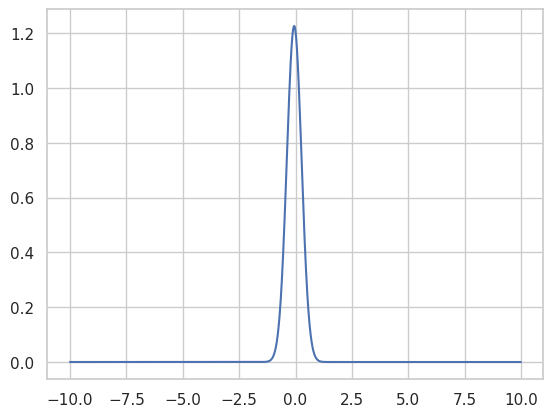

100%|██████████| 3279/3279 [00:21<00:00, 150.51it/s]


Distribution on encrypted data:


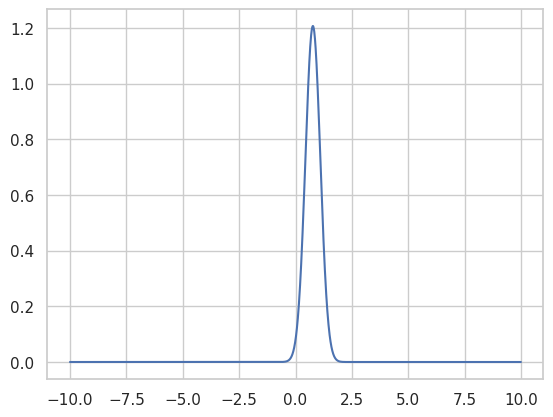

In [ ]:
normal_dist = lambda x, mean, var: np.exp(- np.square(x - mean) / (2 * var)) / np.sqrt(2 * np.pi * var)

def plot_normal_dist(mean, var, rmin=-10, rmax=10):
    x = np.arange(rmin, rmax, 0.01)
    y = normal_dist(x, mean, var)
    fig = plt.plot(x, y)

# plain distribution
lr = LR(n_features)
data = lr.lr(torch.tensor(X_test_fin))
mean, var = map(float, [data.mean(), data.std() ** 2])
plot_normal_dist(mean, var)
print("Distribution on plain data:")
plt.show()

# encrypted distribution
def encrypted_out_distribution(eelr, enc_x_test):
    w = eelr.weight
    b = eelr.bias
    data = []
    for enc_x in tqdm(enc_x_test):
        enc_out = enc_x.dot(w) + b
        data.append(enc_out.decrypt())
    data = torch.tensor(data)
    mean, var = map(float, [data.mean(), data.std() ** 2])
    plot_normal_dist(mean, var)
    print("Distribution on encrypted data:")
    plt.show()

eelr = EncryptedLR(lr)
eelr.encrypt(ctx_eval)
encrypted_out_distribution(eelr, enc_x_test)

In [ ]:
eelr = EncryptedLR(LR(n_features))
accuracy = eelr.plain_accuracy(torch.tensor(X_test_fin), torch.tensor(y_test_fin))
print(f"Accuracy at epoch #0 is {accuracy}")

times = []
for epoch in range(EPOCHS):
    eelr.encrypt(ctx_training)

    # if you want to keep an eye on the distribution to make sure
    # the function approximation is still working fine
    # WARNING: this operation is time consuming
    # encrypted_out_distribution(eelr, enc_x_train)

    t_start = time()
    print(zip(enc_x_train, enc_y_train))
    for enc_x, enc_y in tqdm(zip(enc_x_train, enc_y_train)):
        enc_out = eelr.forward(enc_x)
        eelr.backward(enc_x, enc_out, enc_y)
    eelr.update_parameters()
    t_end = time()
    times.append(t_end - t_start)

    eelr.decrypt()
    accuracy = eelr.plain_accuracy(torch.tensor(X_test_fin), torch.tensor(y_test_fin))
    print(f"Accuracy at epoch #{epoch + 1} is {accuracy}")


print(f"\nAverage time per epoch: {int(sum(times) / len(times))} seconds")
print(f"Final accuracy is {accuracy}")

diff_accuracy = plain_accuracy - accuracy
print(f"Difference between plain and encrypted accuracies: {diff_accuracy}")
if diff_accuracy < 0:
    print("Oh! We got a better accuracy when training on encrypted data! The noise was on our side...")

Accuracy at epoch #0 is 0.5215004682540894


7629it [22:48,  5.57it/s]


Accuracy at epoch #1 is 0.7108874917030334


7629it [22:43,  5.60it/s]


Accuracy at epoch #2 is 0.7148520946502686


7629it [22:42,  5.60it/s]


Accuracy at epoch #3 is 0.7148520946502686


7629it [22:40,  5.61it/s]


Accuracy at epoch #4 is 0.7145470976829529


7629it [22:36,  5.63it/s]


Accuracy at epoch #5 is 0.7044830918312073

Average time per epoch: 1362 seconds
Final accuracy is 0.7044830918312073
Difference between plain and encrypted accuracies: 0.010673940181732178



Test Set Performance:
Accuracy: 0.7044830741079597
F1-Score: 0.21791767554479421
ROC AUC Score: 0.6110693362048512
Confusion Matrix:
 [[2175  169]
 [ 800  135]]


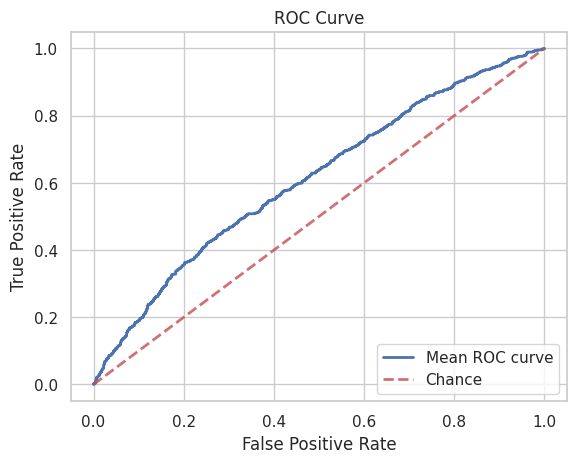

In [ ]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Assuming `eelr` is your instance of EncryptedLR and it's already decrypted
# Instantiate the PyTorch model
n_features = len(eelr.weight)  # Assuming the number of features is the length of the weight vector
pytorch_lr_model = LR(n_features)

# Convert list weights and biases from EncryptedLR to PyTorch tensors and assign them
pytorch_lr_model.lr.weight.data = torch.tensor([eelr.weight], dtype=torch.float32)
pytorch_lr_model.lr.bias.data = torch.tensor(eelr.bias, dtype=torch.float32)

# # Convert numpy arrays to PyTorch tensors
X_test_fin = torch.from_numpy(X_test_fin).float()
y_test_fin = torch.from_numpy(y_test_fin).float()

# Use the PyTorch model to predict
y_pred_test_prob = pytorch_lr_model(X_test_fin).detach().numpy()  # Get probabilities
y_pred_test = (y_pred_test_prob > 0.5).astype(int)  # Convert probabilities to 0/1 predictions

# Calculate evaluation metrics using sklearn
accuracy_test = accuracy_score(y_test_fin, y_pred_test)
f1_test = f1_score(y_test_fin, y_pred_test)
roc_auc_test = roc_auc_score(y_test_fin, y_pred_test_prob)
conf_matrix_test = confusion_matrix(y_test_fin, y_pred_test)

print("\nTest Set Performance:")
print("Accuracy:", accuracy_test)
print("F1-Score:", f1_test)
print("ROC AUC Score:", roc_auc_test)
print("Confusion Matrix:\n", conf_matrix_test)

# Plot ROC Curve
mean_fpr, mean_tpr, _ = roc_curve(y_test_fin, y_pred_test_prob)
plt.plot(mean_fpr, mean_tpr, lw=2, label='Mean ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pickle

# Function to save model parameters to a file
def save_model_parameters(model, filename):
    # Gather the parameters in a dictionary
    model_parameters = {
        'weights': model.weight,
        'biases': model.bias
    }

    # Use pickle to serialize the dictionary and save it to a file
    with open(filename, 'wb') as file:
        pickle.dump(model_parameters, file)

# Assuming `eelr` is your instance of EncryptedLR
save_model_parameters(eelr, 'encrypted_model.pkl')

In [ ]:
import torch
import numpy as np
import tenseal as ts
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from time import time

n_splits = 5
kf = KFold(n_splits=n_splits)

results = {
    "accuracy": [],
    "f1_score": [],
    "roc_auc_score": [],
    "confusion_matrix": []
}

# Assume enc_x_train and enc_y_train are already defined and encrypted
for train_index, test_index in kf.split(X_train_fin):
    enc_x_train_fold = [enc_x_train[i] for i in train_index]
    enc_y_train_fold = [enc_y_train[i] for i in train_index]
    X_test_fold = X_train_fin[test_index]
    y_test_fold = y_train_fin[test_index]

    # Initialize the model from the plain Logistic Regression weights
      # Assuming LR is your logistic regression model
    torch_lr = LR(n_features)
    eelr = EncryptedLR(torch_lr)
    eelr.encrypt(ctx_training)  # This assumes you only need to encrypt model parameters

    # Train on encrypted data
    for epoch in range(EPOCHS):
        for enc_x, enc_y in tqdm(zip(enc_x_train_fold, enc_y_train_fold)):
            enc_out = eelr(enc_x)
            eelr.backward(enc_x, enc_out, enc_y)
        eelr.update_parameters()
        eelr.decrypt()
        plain_accuracy = eelr.plain_accuracy(torch.tensor(X_test_fold), torch.tensor(y_test_fold))
        eelr.encrypt(ctx_training)
        print(f"Accuracy at epoch #{epoch + 1} is {plain_accuracy}")
    # Decrypt the model for evaluation

    # Evaluate on the plain test set
    eelr.decrypt()
    pytorch_lr = LR(n_features)
    pytorch_lr_model.lr.weight.data = torch.tensor([eelr.weight], dtype=torch.float32)
    pytorch_lr_model.lr.bias.data = torch.tensor(eelr.bias, dtype=torch.float32)

    # # Convert numpy arrays to PyTorch tensors
    X_test_fold = torch.tensor(X_test_fold).float()
    y_test_fold = torch.tensor(y_test_fold).float()
    y_test_np = y_test_fold.detach().numpy()

    # Use the PyTorch model to predict
    y_pred_test_prob = pytorch_lr_model(X_test_fold).detach().numpy()  # Get probabilities
    y_pred_test = (y_pred_test_prob > 0.5).astype(int)  # Convert probabilities to 0/1 predictions

    # Calculate evaluation metrics using sklearn
    results['accuracy'].append(accuracy_score(y_test_np, y_pred_test))
    results['f1_score'].append(f1_score(y_test_np, y_pred_test))
    results['roc_auc_score'].append(roc_auc_score(y_test_np, y_pred_test_prob))
    results['confusion_matrix'].append(confusion_matrix(y_test_np, y_pred_test))

# Print results
for metric, scores in results.items():
    print(f"{metric}: Mean = {np.mean(scores)}, Scores = {scores}")

6103it [17:41,  5.75it/s]


Accuracy at epoch #1 is 0.7149410247802734


6103it [17:40,  5.75it/s]


Accuracy at epoch #2 is 0.7287024855613708


6103it [17:40,  5.75it/s]


Accuracy at epoch #3 is 0.7247706651687622


6103it [17:38,  5.77it/s]


Accuracy at epoch #4 is 0.7306684255599976


6103it [17:37,  5.77it/s]


Accuracy at epoch #5 is 0.69986891746521


6103it [17:37,  5.77it/s]


Accuracy at epoch #1 is 0.6972476840019226


6103it [17:36,  5.77it/s]


Accuracy at epoch #2 is 0.697903037071228


6103it [17:38,  5.77it/s]


Accuracy at epoch #3 is 0.6788991093635559


6103it [17:38,  5.77it/s]


Accuracy at epoch #4 is 0.6920052170753479


6103it [17:40,  5.75it/s]


Accuracy at epoch #5 is 0.6651375889778137


6103it [17:40,  5.75it/s]


Accuracy at epoch #1 is 0.6513761281967163


6103it [17:35,  5.78it/s]


Accuracy at epoch #2 is 0.6841415762901306


6103it [17:34,  5.79it/s]


Accuracy at epoch #3 is 0.6448230743408203


6103it [17:35,  5.78it/s]


Accuracy at epoch #4 is 0.6651375889778137


6103it [17:38,  5.77it/s]


Accuracy at epoch #5 is 0.6461336612701416


6103it [17:38,  5.76it/s]


Accuracy at epoch #1 is 0.6618610620498657


6103it [17:38,  5.77it/s]


Accuracy at epoch #2 is 0.7188728451728821


6103it [17:37,  5.77it/s]


Accuracy at epoch #3 is 0.6664482355117798


6103it [17:37,  5.77it/s]


Accuracy at epoch #4 is 0.7083879709243774


6103it [17:39,  5.76it/s]


Accuracy at epoch #5 is 0.6539973616600037


6104it [17:42,  5.74it/s]


Accuracy at epoch #1 is 0.6832786798477173


6104it [17:42,  5.75it/s]


Accuracy at epoch #2 is 0.7095081806182861


6104it [17:43,  5.74it/s]


Accuracy at epoch #3 is 0.6826229691505432


6104it [17:44,  5.74it/s]


Accuracy at epoch #4 is 0.6990163922309875


6104it [17:52,  5.69it/s]


Accuracy at epoch #5 is 0.6996721029281616
accuracy: Mean = 0.6730930107642394, Scores = [0.700524246395806, 0.6651376146788991, 0.6461336828309305, 0.653997378768021, 0.699672131147541]
f1_score: Mean = 0.2754619679574886, Scores = [0.14897579143389197, 0.32317880794701986, 0.31645569620253167, 0.25633802816901413, 0.3323615160349854]
roc_auc_score: Mean = 0.61051755643248, Scores = [0.5954763101275048, 0.6188343920302684, 0.6085551914078293, 0.6003897521836279, 0.6293321364131697]
confusion_matrix: Mean = 381.45, Scores = [array([[1029,   84],
       [ 373,   40]]), array([[893, 174],
       [337, 122]]), array([[861, 202],
       [338, 125]]), array([[907, 187],
       [341,  91]]), array([[953, 175],
       [283, 114]])]


5-Fold Results (Unecrypted):
accuracy: Mean = 0.7175278774466622, Scores = [0.7359108781127129, 0.7051114023591087, 0.7024901703800787, 0.7064220183486238, 0.7377049180327869]
f1_score: Mean = 0.1490155371686161, Scores = [0.14437367303609341, 0.16666666666666669, 0.16236162361623618, 0.14503816793893132, 0.12663755458515286]
roc_auc_score: Mean = 0.6352012366796125, Scores = [0.6400301086216387, 0.6209579114369896, 0.6462231469271733, 0.6265848229399418, 0.642210193472319]
confusion_matrix: Mean = 381.45, Scores = [array([[1089,   24],
       [ 379,   34]]), array([[1031,   36],
       [ 414,   45]]), array([[1028,   35],
       [ 419,   44]]), array([[1040,   54],
       [ 394,   38]]), array([[1096,   32],
       [ 368,   29]])]

[0.6730930107642394, 0.2754619679574886, 0.61051755643248] [0.022863329501408604, 0.06864316290794006, 0.012294881536723945]


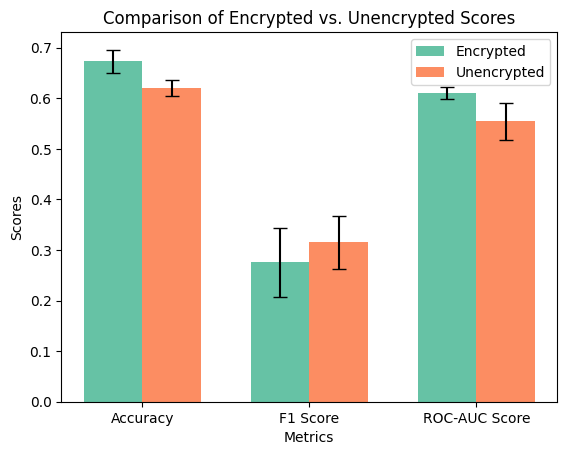

In [28]:
encrypted_accuracy = [0.700524246395806, 0.6651376146788991, 0.6461336828309305, 0.653997378768021, 0.699672131147541]
encrypted_f1 = [0.14897579143389197, 0.32317880794701986, 0.31645569620253167, 0.25633802816901413, 0.3323615160349854]
encrypted_rocauc = [0.5954763101275048, 0.6188343920302684, 0.6085551914078293, 0.6003897521836279, 0.6293321364131697]

unencrypted_accuracy = [0.6330275229357798, 0.6277850589777195, 0.6376146788990825, 0.6028833551769331, 0.600655737704918]
unencrypted_f1 = [0.3926247288503254, 0.27918781725888325, 0.26948480845442535, 0.27163461538461536, 0.362303664921466]
unencrypted_rocauc = [0.5984958742051345, 0.5250973449881879, 0.5499716560774855, 0.5048623806621979, 0.5920489665398289]

# Set up the data
encrypted_avg = [np.mean(encrypted_accuracy), np.mean(encrypted_f1), np.mean(encrypted_rocauc)]
encrypted_std = [np.std(encrypted_accuracy), np.std(encrypted_f1), np.std(encrypted_rocauc)]
print(encrypted_avg, encrypted_std)

unencrypted_avg = [np.mean(unencrypted_accuracy), np.mean(unencrypted_f1), np.mean(unencrypted_rocauc)]
unencrypted_std = [np.std(unencrypted_accuracy), np.std(unencrypted_f1), np.std(unencrypted_rocauc)]

# Set up the data
categories = ['Accuracy', 'F1 Score', 'ROC-AUC Score']
bar_width = 0.35
index = np.arange(len(categories))

# Define colors
encrypted_color = '#66c2a5'  # greenish
unencrypted_color = '#fc8d62'  # orangish

# Plotting
fig, ax = plt.subplots()
bar1 = ax.bar(index - bar_width/2, encrypted_avg, bar_width, yerr=encrypted_std, capsize=5, label='Encrypted', color=encrypted_color)
bar2 = ax.bar(index + bar_width/2, unencrypted_avg, bar_width, yerr=unencrypted_std, capsize=5, label='Unencrypted', color=unencrypted_color)

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Encrypted vs. Unencrypted Scores')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.legend()

# Display the

### 2 Layer MLP Encrypted Training and Evaluation

!!!!!!!!
**This part cannot finish execution due to high demand of time and resources**
!!!!!!!!

In [ ]:
import torch
import tenseal as ts
import pandas as pd
import random
from time import time

# those are optional and are not necessary for training
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
# parameters
poly_mod_degree = 16384
coeff_mod_bit_sizes = [40, 21, 21, 21, 40]
# create TenSEALContext
ctx_eval = ts.context(ts.SCHEME_TYPE.CKKS, poly_mod_degree, -1, coeff_mod_bit_sizes)
# scale of ciphertext to use
ctx_eval.global_scale = 2 ** 20
# this key is needed for doing dot-product operations
ctx_eval.generate_galois_keys()

In [ ]:
# parameters
poly_mod_degree = 8192
coeff_mod_bit_sizes = [40, 21, 21, 21, 21, 21, 21, 40]
# create TenSEALContext
ctx_training = ts.context(ts.SCHEME_TYPE.CKKS, poly_mod_degree, -1, coeff_mod_bit_sizes)
ctx_training.global_scale = 2 ** 21
ctx_training.generate_galois_keys()

In [ ]:
t_start = time()
enc_x_train = [ts.ckks_vector(ctx_training, x.tolist()) for x in X_train_fin[:100]]
t_end = time()
print(f"Encryption of the training_set took {int(t_end - t_start)} seconds")

In [ ]:
enc_y_train = [ts.ckks_vector(ctx_training, y.tolist()) for y in y_train_fin[:100]]

In [ ]:
class MLP2(torch.nn.Module):

    def __init__(self, n_features, n_hidden):
        super(MLP2, self).__init__()
        self.h1 = torch.nn.Linear(n_features, n_hidden)
        self.h2 = torch.nn.Linear(n_hidden, 1) # second linear layer added

    def forward(self, x):
        o1 = torch.sigmoid(self.h1(x))
        out = torch.sigmoid(self.h2(o1))
        return out

In [ ]:
n_features = X_train_fin.shape[1]
NUM_HIDDEN = 5
model = MLP2(n_features, NUM_HIDDEN)
# use gradient descent with a learning_rate=1
optim = torch.optim.SGD(model.parameters(), lr=1)
# use Binary Cross Entropy Loss
criterion = torch.nn.BCELoss()

In [ ]:
def accuracy(model, x, y):
    out = model(x)
    correct = torch.abs(y - out) < 0.5
    return correct.float().mean()

In [ ]:
EPOCHS = 5

def train(model, optim, criterion, x, y, epochs=EPOCHS):
    for e in range(1, epochs + 1):
        optim.zero_grad()
        out = model(x)
        print(out.dtype, y.dtype)
        loss = criterion(out, y)
        loss.backward()
        optim.step()
        print(f"Loss at epoch {e}: {loss.data}")
        plain_accuracy = accuracy(model, torch.tensor(X_test_fin), torch.tensor(y_test_fin))
        print(f"Accuracy on plain test_set: {plain_accuracy}")
    return model

model = train(model, optim, criterion, torch.tensor(X_train_fin), torch.tensor(y_train_fin))

torch.float32 torch.float32
Loss at epoch 1: 0.8058459162712097
Accuracy on plain test_set: 0.7148520946502686
torch.float32 torch.float32
Loss at epoch 2: 0.6366924047470093
Accuracy on plain test_set: 0.7148520946502686
torch.float32 torch.float32
Loss at epoch 3: 0.6044758558273315
Accuracy on plain test_set: 0.7148520946502686
torch.float32 torch.float32
Loss at epoch 4: 0.5971039533615112
Accuracy on plain test_set: 0.7148520946502686
torch.float32 torch.float32
Loss at epoch 5: 0.594877302646637
Accuracy on plain test_set: 0.7148520946502686


In [ ]:


plain_accuracy = accuracy(model, torch.tensor(X_test_fin), torch.tensor(y_test_fin))
print(f"Accuracy on plain test_set: {plain_accuracy}")
new_model = MLP2(n_features, NUM_HIDDEN)
plain_accuracy_new = accuracy(new_model, torch.tensor(X_test_fin), torch.tensor(y_test_fin))
print(f"Untrained Accuracy on plain test_set: {plain_accuracy_new}")

Accuracy on plain test_set: 0.7148520946502686
Untrained Accuracy on plain test_set: 0.28514790534973145


In [ ]:
class EncryptedMLP2:
    def __init__(self, torch_mlp):
        self.weight1 = torch_mlp.h1.weight.data.tolist()
        self.bias1 = torch_mlp.h1.bias.data.tolist()
        self.weight2 = torch_mlp.h2.weight.data.tolist()
        self.bias2 = torch_mlp.h2.bias.data.tolist()
        # Gradient accumulators
        self._delta_w1 = 0
        self._delta_b1 = 0
        self._delta_w2 = 0
        self._delta_b2 = 0
        self.n_input = torch_mlp.h1.weight.data.shape[0]
        self.n_hidden = torch_mlp.h1.weight.data.shape[0]
        print(self.n_input, self.n_hidden)
        self._count = 0

    def forward(self, enc_x):
        enc_o1 = self.weight1.dot(enc_x) + self.bias1
        enc_o1_sigmoid = EncryptedMLP2.sigmoid(enc_o1)
        print(enc_o1_sigmoid.shape, self.weight2.shape, self.bias2.shape)
        enc_out = self.weight2.dot(enc_o1_sigmoid) + self.bias2
        enc_out_sigmoid = EncryptedMLP2.sigmoid(enc_out)
        return enc_out_sigmoid, (enc_o1, enc_o1_sigmoid, enc_out_sigmoid)

    def backward(self, enc_x, forward_outputs, enc_y):
        enc_o1, enc_o1_sigmoid, enc_out_sigmoid = forward_outputs
        enc_error_out = enc_out_sigmoid - enc_y
        self._delta_w2 += enc_o1_sigmoid.dot(enc_error_out)
        self._delta_b2 += enc_error_out
        enc_error_o1 = (self.weight2.dot(enc_error_out)) * enc_o1_sigmoid * (1 - enc_o1_sigmoid)
        self._delta_w1 += enc_x.dot(enc_error_o1)
        self._delta_b1 += enc_error_o1
        self._count += 1

    @staticmethod
    def sigmoid(enc_x):
        return enc_x.polyval([0.5, 0.197, 0, -0.004])

    def update_parameters(self, learning_rate=0.01, regularization=0.05):
        if self._count == 0:
            raise RuntimeError("You should at least run one forward iteration")
        self.weight1 -= (self._delta_w1 / self._count) * learning_rate + self.weight1 * regularization
        self.bias1 -= (self._delta_b1 / self._count) * learning_rate
        self.weight2 -= (self._delta_w2 / self._count) * learning_rate + self.weight2 * regularization
        self.bias2 -= (self._delta_b2 / self._count) * learning_rate
        self._delta_w1 = 0
        self._delta_b1 = 0
        self._delta_w2 = 0
        self._delta_b2 = 0
        self._count = 0

    def encrypt(self, context):
        self.weight1 = ts.ckks_tensor(context, self.weight1)
        self.bias1 = ts.ckks_tensor(context, self.bias1)
        self.weight2 = ts.ckks_tensor(context, self.weight2)
        self.bias2 = ts.ckks_tensor(context, self.bias2)

    def decrypt(self):
        self.weight1 = self.weight1.decrypt()
        self.bias1 = self.bias1.decrypt()
        self.weight2 = self.weight2.decrypt()
        self.bias2 = self.bias2.decrypt()

    def plain_accuracy(self, x_test, y_test):
        # First, perform a forward pass with plain data.
        w1 = torch.tensor(self.weight1)
        b1 = torch.tensor(self.bias1)
        w2 = torch.tensor(self.weight2)
        b2 = torch.tensor(self.bias2)

        # Forward pass through first layer
        out1 = torch.sigmoid(x_test.matmul(w1.t()) + b1)

        # Forward pass through second layer
        out2 = torch.sigmoid(out1.matmul(w2.t()) + b2)

        # Calculate predictions (as 0 or 1) by thresholding the output at 0.5
        predictions = (out2 >= 0.5).float()

        # Compute accuracy by comparing predictions to actual labels
        correct = (predictions == y_test).float()
        accuracy = correct.mean()

        return accuracy

    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)[0]

In [ ]:
def load_batch(data, batch_size, index):
    start_idx = index * batch_size
    end_idx = min(start_idx + batch_size, len(data))  # Ensure not to go out of bounds
    return data[start_idx:end_idx]

In [ ]:
ee_mlp2 = EncryptedMLP2(MLP2(n_features, NUM_HIDDEN))
accuracy = ee_mlp2.plain_accuracy(torch.tensor(X_test_fin), torch.tensor(y_test_fin))
print(f"Accuracy at epoch #0 is {accuracy}")
ee_mlp2.encrypt(ctx_training)

batch_size = 100  # Set your batch size
num_batches = (len(X_train_fin) + batch_size - 1) // batch_size  # This ensures all batches are counted

for epoch in range(EPOCHS):
    print(f"Starting epoch {epoch + 1}/{EPOCHS}")
    for batch_index in range(num_batches):
        # Load a batch of data
        X_batch = load_batch(X_train_fin, batch_size, batch_index)
        y_batch = load_batch(y_train_fin, batch_size, batch_index)

        # Encrypt the batch data
        enc_x_batch = [ts.ckks_tensor(ctx_training, X.tolist()) for X in X_batch]
        enc_y_batch = [ts.ckks_tensor(ctx_training, y.tolist()) for y in y_batch]

        # Perform training on the batch
        for enc_x, enc_y in zip(enc_x_batch, enc_y_batch):
            print(enc_x.shape, enc_y.shape)
            enc_out, fwd_outputs = ee_mlp2(enc_x)
            ee_mlp2.backward(enc_x, fwd_outputs, enc_y)
        ee_mlp2.update_parameters()

        # Clear the encrypted data from memory to prevent memory overflow
        del enc_x_batch
        del enc_y_batch
        # Optional: Force garbage collection
        import gc
        gc.collect()

    # Update parameters after processing all batches


    # Decrypt and calculate accuracy if needed
    ee_mlp2.decrypt()
    accuracy = ee_mlp2.plain_accuracy(torch.tensor(X_test_fin), torch.tensor(y_test_fin))
    print(f"Accuracy at epoch #{epoch + 1} is {accuracy}")

    # Re-encrypt weights for the next epoch
    ee_mlp2.encrypt(ctx_training)


print(f"Final accuracy is {accuracy}")

diff_accuracy = plain_accuracy - accuracy
print(f"Difference between plain and encrypted accuracies: {diff_accuracy}")
if diff_accuracy < 0:
    print("Oh! We got a better accuracy when training on encrypted data! The noise was on our side...")

5 5
Accuracy at epoch #0 is 0.28514790534973145
Starting epoch 1/5
